# Assignment: Working with Data

>Using the data below, answer the following questions:

>1) Which entities (top 5) had the largest population density in 2020?
>2) Which entities have more water area than land area?
>3) Which entities increased in population the most in the last 10 years?
>4) What state bird accounts for the largest population as of 2020? Land area?
>5) How many entities' largest city is their capital city?
>6) Which city has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)

In [1]:
import pandas as pd

In [2]:

facts = pd.read_csv('../data/state_facts.tsv',delimiter="\t")
facts.head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_1,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop
0,Alabama,135767,131171,4597,5024279.0,4779736,7,Yellowhammer (Northern flicker),Camellia,Audemus jura nostra defendere,...,Birmingham,208928,Huntsville,204189.0,Montgomery,198525.0,Mobile,189572.0,Tuscaloosa,101113.0
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Anchorage,291538,Juneau,32113.0,Fairbanks,31516.0,Wasilla,10529.0,Sitka,8647.0
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,Tafuna,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0
3,Arizona,295234,294207,1026,7151502.0,6392017,9,Cactus wren,Saguaro cactus blossom,Ditat Deus,...,Phoenix,1680992,Tucson,545975.0,Mesa,508958.0,Chandler,257165.0,Scottsdale,255310.0
4,Arkansas,137732,134771,2961,3011524.0,2915918,4,Northern mockingbird,Apple blossom,Regnat populus,...,Little Rock,197312,Fort Smith,87845.0,Fayetteville,86751.0,Springdale,81029.0,Jonesboro,76990.0


In [3]:
#Which entities (top 5) had the largest population density in 2020?
facts["Pop_den"]=facts["Pop_2020"]/facts["Area_tot"]
facts.sort_values(by="Pop_den", ascending=False).head(5)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Pop_den
9,District of Columbia,177,158,19,689545.0,601723,1*,Wood thrush,American Beauty Rose,Justitia Omnibus,...,702455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3895.734463
32,New Jersey,22591,19047,3544,9288994.0,8791894,12,Eastern goldfinch (American goldfinch),Violet,Liberty and Prosperity,...,282090,Jersey City,265549.0,Paterson,145627.0,Elizabeth,128885.0,Edison,100008.0,411.181178
43,Rhode Island,4001,2678,1324,1097379.0,1052567,2,Rhode Island Red,Violet,Hope,...,179883,Cranston,81274.0,Warwick,80847.0,Pawtucket,71847.0,East Providence,47476.0,274.276181
23,Massachusetts,27336,20202,7134,7029917.0,6547629,9,Black-capped chickadee,Mayflower,Ense petit placidam sub libertate quietem,...,692600,Worcester,185877.0,Springfield,155032.0,Cambridge,118977.0,Lowell,111670.0,257.166996
7,Connecticut,14357,12542,1816,3605944.0,3574097,5,American robin,Mountain laurel,Qui transtulit sustinet,...,144900,New Haven,130418.0,Stamford,129775.0,Hartford,122105.0,Waterbury,108093.0,251.162778


In [4]:
#Which entities have more water area than land area?
facts[facts["Area_water"] > facts["Area_land"]]

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_1_pop,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Pop_den
2,American Samoa,1505,198,1307,49437.0,55519,1*,None,Paogo (Ulafala),"Samoa, Muamua Le Atua",...,7945,Nu'uuli,3955.0,Pago Pago,3656.0,'Ili'ili,3195.0,Pava'ia'i,2450.0,32.848505
12,Guam,1478,543,935,168.4,159358,1*,Guam rail (ko'ko'),Bougainvillea spectabilis,Where America's Day Begins,...,44943,Yigo,20539.0,Tamuning,19685.0,Mangilao,15191.0,Barrigada,8875.0,0.113938
37,Northern Mariana Islands,5117,472,4644,51.0,53883,1*,Mariana fruit-dove,Flores mayo,NaN,...,48220,Tinian2,3136.0,Rota2,2527.0,Northern Islands2,0.0,NaN,NaN,0.009967
48,United States Virgin Islands,1898,348,1550,106235.0,106405,1*,California gull,Yellow Elder,United in Pride and Hope,...,18481,Sion Farm,13003.0,Northside,10049.0,East End,5128.0,Southcentral,3277.0,55.972076


In [5]:
#Which entities increased in population the most in the last 10 years?
facts["increase"]= facts['Pop_2020'] - facts['Pop_2010']
facts.sort_values(by='increase',ascending=False).head(7)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_2,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Pop_den,increase
47,Texas,695662,676587,19075,29145505.0,25145561,38,Northern mockingbird,Bluebonnet sp.,Friendship,...,San Antonio,1532233.0,Dallas,1356785.0,Austin,978908.0,Fort Worth,902938.0,41.896072,3999944.0
10,Florida,170312,138887,31424,21538187.0,18801310,28,Northern mockingbird,Orange blossom,In God we trust,...,Miami,476329.0,Tampa,401189.0,Orlando,289191.0,St. Petersburg,265098.0,126.463121,2736877.0
5,California,423967,403466,20501,39538223.0,37253956,52,California quail,California poppy,Eureka,...,San Diego,1425976.0,San Jose,1030119.0,San Francisco,884198.0,Fresno,530093.0,93.257784,2284267.0
11,Georgia,153910,148959,4951,10711908.0,9687653,14,Brown thrasher,Cherokee rose,"Wisdom, Justice, Moderation",...,Augusta,196939.0,Columbus,194160.0,Macon,153095.0,Savannah,147181.0,69.598519,1024255.0
52,Washington,184661,172119,12542,7705281.0,6724540,10,Willow goldfinch (American goldfinch),Coast rhododendron,Al-ki,...,Spokane,219190.0,Tacoma,216279.0,Vancouver,183012.0,Bellevue,147599.0,41.726629,980741.0
35,North Carolina,139391,125920,13471,10439388.0,9535483,14,Northern cardinal,Flowering dogwood,Esse quam videri,...,Raleigh,474069.0,Greensboro,298329.0,Durham,278547.0,Winston-Salem,248232.0,74.892841,903905.0
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,Buffalo,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,142.970120,823147.0


In [6]:
#What state bird accounts for the largest population as of 2020? Land area?
facts2 = facts.groupby(by="State_bird").sum()
facts2.sort_values(by='Pop_2020',ascending=False).head(1)
#Northern Mockingbird accounts for the largest population as of 2020

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Pop_den,increase
State_bird,,,,,,,,,,,,,,,
Northern mockingbird,1238297,1178574,59722,63567335.0,56176191,3463383.0,3573810.6,2202168,4262215,2818895.0,2087169.0,1575653.0,1454625.0,277.145135,7391144.0


In [7]:
facts2.sort_values(by='Area_land',ascending=False).head(1)
#the Willow ptarmigan accounts for the largest land area

,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,GDP_2020,GDP_2019,Capital_pop,city_1_pop,city_2_pop,city_3_pop,city_4_pop,city_5_pop,Pop_den,increase
State_bird,,,,,,,,,,,,,,,
Willow ptarmigan,1723337,1477953,245384,733391.0,710231,50246.7,54385.6,32113,291538,32113.0,31516.0,10529.0,8647.0,0.425564,23160.0


In [8]:
#How many entities' largest city is their capital city?
facts[facts['Capital'] == facts['City_1']].count()

State           17
Area_tot        17
Area_land       17
Area_water      17
Pop_2020        17
Pop_2010        17
Rep_seats       17
State_bird      17
State_flower    17
State_motto     17
Motto_trans     11
USPS_code       17
GDP_2020        17
GDP_2019        17
Capital         17
Capital_pop     17
City_1          17
city_1_pop      17
City_2          16
city_2_pop      16
City_3          16
city_3_pop      16
City_4          16
city_4_pop      16
City_5          16
city_5_pop      16
Pop_den         17
increase        17
dtype: int64

In [9]:
#Which state has the largest percent drop from their largest city to their 5th largest? 100*(1st largest - 5th largest)/(1st largest)
facts['drop'] = ((facts['city_1_pop'] - facts['city_5_pop'])/facts['city_1_pop'])* 100
facts.sort_values(by="drop", ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,city_2_pop,City_3,city_3_pop,City_4,city_4_pop,City_5,city_5_pop,Pop_den,increase,drop
34,New York,141297,122057,19240,20201249.0,19378102,26,Eastern bluebird,Rose,Excelsior!,...,251298.0,Rochester,206284.0,Yonkers,199663.0,Syracuse,142749.0,142.97012,823147.0,98.392453


>Using the "state_dates.tsv" data, answer the remaining questions. You will need to merge the two data sets together:

>7) Of the states that joined the United States before 1790, what is the most common state flower?
>8) Which has the larger population density, the most dense US Territory or the least dense state?
>9) Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
>10) Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)

In [10]:
dates = pd.read_csv('../data/state_dates.tsv',delimiter="\t")
dates.head(5)

,Name,Date,Status,Abbreviation
0,Alabama,"December 14, 1819",State,AL
1,Alaska,"January 3, 1959",State,AK
2,American Samoa,"April 17, 1900",Territory,AS
3,Arizona,"February 14, 1912",State,AZ
4,Arkansas,"June 15, 1836",State,AR


In [11]:
dates['Date_Fixed'] = pd.to_datetime(dates['Date'],errors='raise')

In [12]:
dates[dates['Date_Fixed']<pd.datetime(1790,1,1)]

/tmp/ipykernel_1515871/1468350482.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  dates[dates['Date_Fixed']<pd.datetime(1790,1,1)]


,Name,Date,Status,Abbreviation,Date_Fixed
7,Connecticut,"January 9, 1788",State,CT,1788-01-09
8,Delaware,"December 7, 1787",State,DE,1787-12-07
11,Georgia,"January 2, 1788",State,GA,1788-01-02
22,Maryland,"April 28, 1788",State,MD,1788-04-28
23,Massachusetts,"February 6, 1788",State,MA,1788-02-06
31,New Hampshire,"June 21, 1788",State,NH,1788-06-21
32,New Jersey,"December 18, 1787",State,NJ,1787-12-18
34,New York,"July 26, 1788",State,NY,1788-07-26
35,North Carolina,"November 21, 1789",State,NC,1789-11-21
41,Pennsylvania,"December 12, 1787",State,PA,1787-12-12


In [13]:
#Of the states that joined the United States before 1790, what is the most common state flower?
merge = pd.merge(facts,dates,left_on='USPS_code',right_on='Abbreviation',how='outer')
OldStateBirds = merge[merge['Date_Fixed']<pd.datetime(1790,1,1)].groupby(by="State_flower").count()
OldStateBirds
#therefore mountain laurel is the most common state flower of states that joined the Union before 1790

/tmp/ipykernel_1515871/3187473204.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  OldStateBirds = merge[merge['Date_Fixed']<pd.datetime(1790,1,1)].groupby(by="State_flower").count()


,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_motto,Motto_trans,...,City_5,city_5_pop,Pop_den,increase,drop,Name,Date,Status,Abbreviation,Date_Fixed
State_flower,,,,,,,,,,,,,,,,,,,,,
American dogwood,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Black-eyed susan,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Cherokee rose,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Flowering dogwood,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mayflower,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Mountain laurel,2,2,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
Peach blossom,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Purple lilac,1,1,1,1,1,1,1,1,1,0,...,1,1,1,1,1,1,1,1,1,1
Rose,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [14]:
#Which has the larger population density, the most dense US Territory or the least dense state?
territories = merge[merge["Status"] == "Territory"]
territories.sort_values(by="Pop_den", ascending=False).head(1)

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_5,city_5_pop,Pop_den,increase,drop,Name,Date,Status,Abbreviation,Date_Fixed
42,Puerto Rico,13791,8868,4924,3285874.0,3725789,1*,None,Flor de Maga,Joannes Est Nomen Eius,...,Caguas,124434.0,238.2622,-439915.0,68.523699,Puerto Rico,"April 11, 1899",Territory,PR,1899-04-11


In [15]:
states = merge[merge["Status"] == "State"]
states.sort_values(by="Pop_den", ascending=True).head(1)
#Therefore the most dense US Territory has a larger popualation density than the least dense state

,State,Area_tot,Area_land,Area_water,Pop_2020,Pop_2010,Rep_seats,State_bird,State_flower,State_motto,...,City_5,city_5_pop,Pop_den,increase,drop,Name,Date,Status,Abbreviation,Date_Fixed
1,Alaska,1723337,1477953,245384,733391.0,710231,1,Willow ptarmigan,Forget-me-not,North to the Future,...,Sitka,8647.0,0.425564,23160.0,97.034006,Alaska,"January 3, 1959",State,AK,1959-01-03


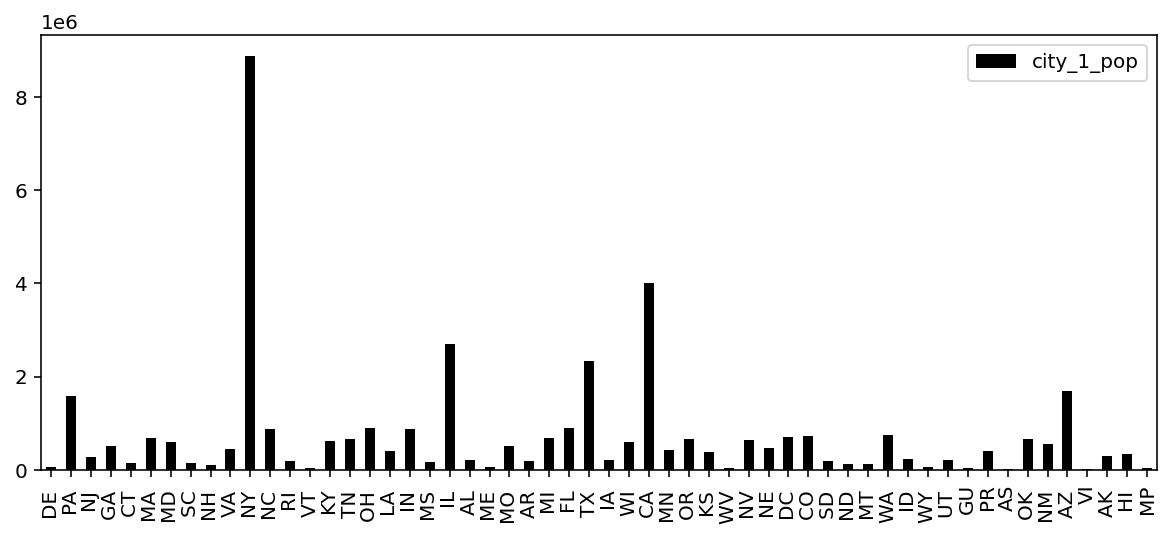

In [21]:
#Make a graph that plots the populations of the largest city in each entity in the order in which they joined the US. Make the bars black
import matplotlib as plt
%config InlineBackend.figure_format ='retina'
merge = merge.sort_values(by="Date_Fixed", ascending=True)
plot = merge[['city_1_pop','Abbreviation']].plot(kind='bar',figsize=(10,4), color='black')
plot.set_xticklabels(merge['Abbreviation']);

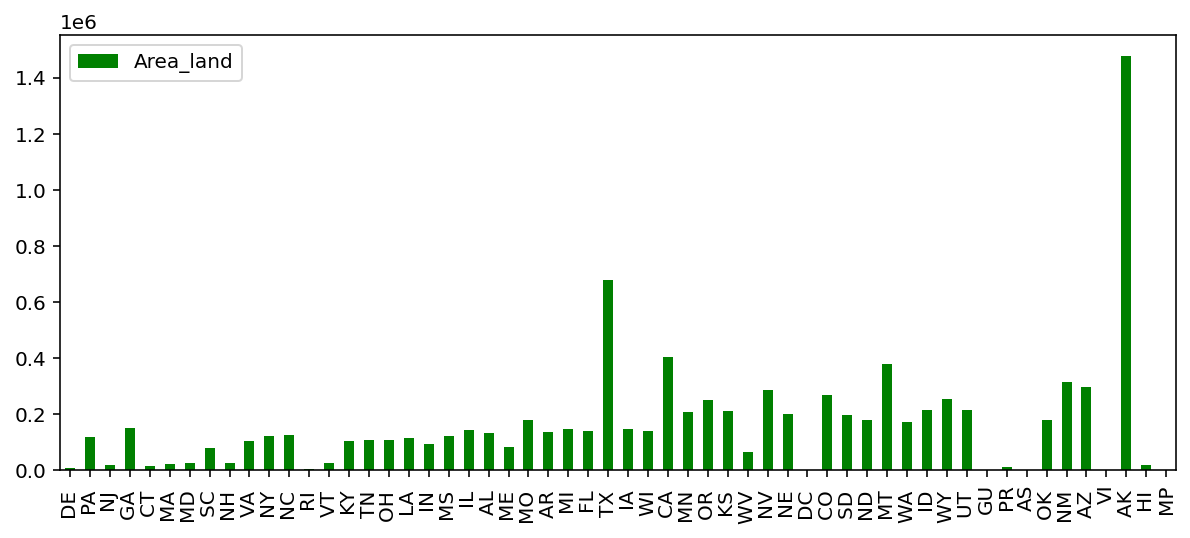

In [23]:
#Make two additional graphs like the one above but one for land area (green bars) and one for water area (blue bars)
plot2 = merge[['Area_land','Abbreviation']].plot(kind='bar',figsize=(10,4), color='green')
plot2.set_xticklabels(merge['Abbreviation']);

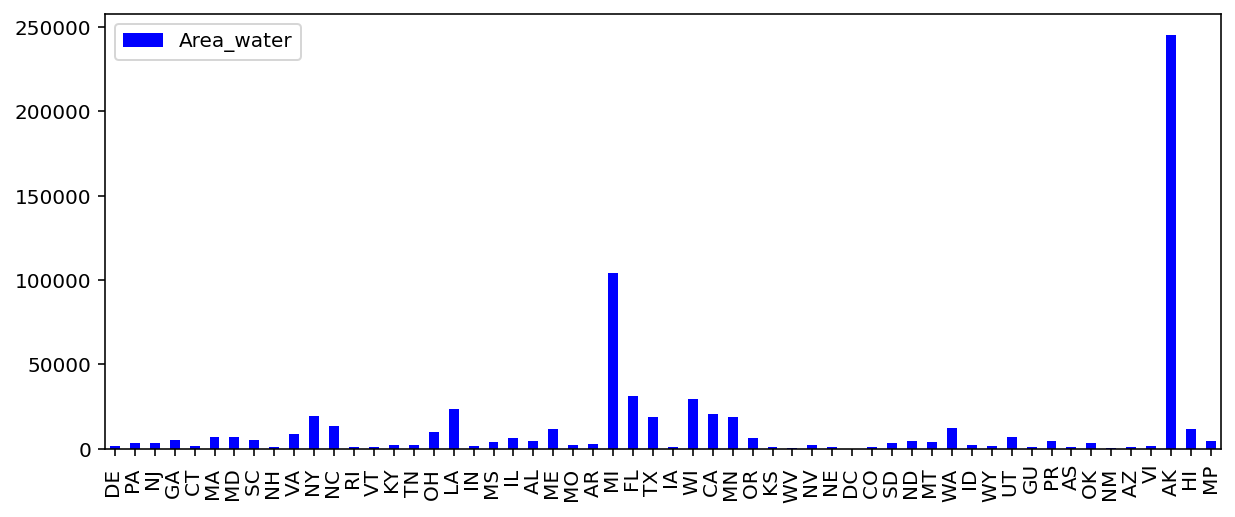

In [24]:
plot3 = merge[['Area_water','Abbreviation']].plot(kind='bar',figsize=(10,4), color='blue')
plot3.set_xticklabels(merge['Abbreviation']);